In [102]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [103]:
import numpy as np
import pandas as pd
import datetime as dt

Reflect Tables into SQLAlchemy ORM

In [ ]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [105]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [ ]:
# reflect an existing database into a new model. Declaring a base
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [107]:
#Use the base class to reflect the database tables. reflect the tables
Base.prepare(autoload_with=engine)

In [108]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [109]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [110]:
# Create our session (link) from Python to the DB
session = Session(engine) 

Exploratory Precipitation Analysis

In [111]:
# Find the most recent date in the data set.
first_row = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
first_row

('2017-08-23',)

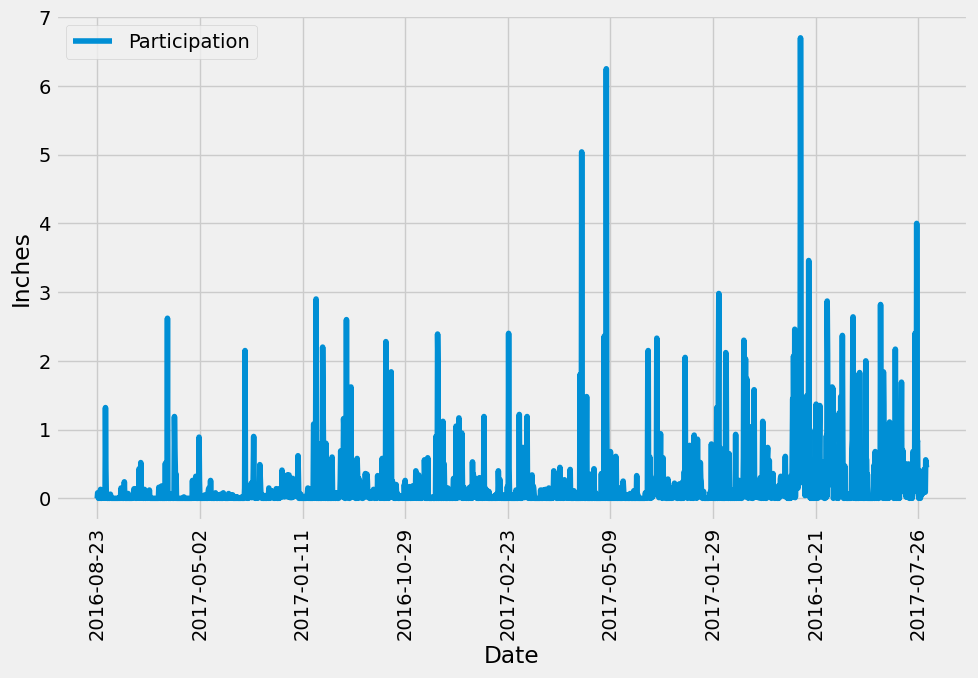

In [112]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_year = dt.date(2017,8,23)-dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
results_df = pd.DataFrame(results, columns=["Date", "Participation"]).set_index("Date").dropna(how="any")

# Sort the dataframe by date
reselts_df = results_df.sort_values("Date")
results_df

# Use Pandas Plotting with Matplotlib to plot the data
results_df.plot(ylabel ="Inches", grid=True, figsize=(10,7))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [113]:
# Use Pandas to calculate the summary statistics for the precipitation data
results_df.describe()

,Participation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


Exploratory Station Analysis

In [114]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Measurement.station).distinct().count()
total_stations

9

In [115]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_station = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [116]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station2 = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
active_station2

[(54.0, 85.0, 71.66378066378067)]

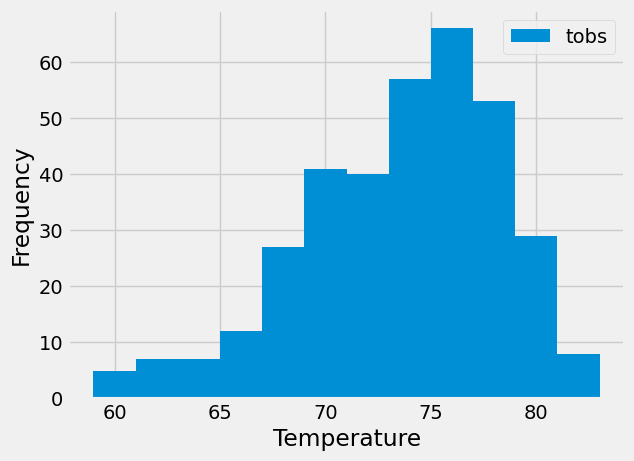

In [117]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_data = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= last_year).all()  

active_data = pd.DataFrame(active_data, columns=['tobs'])
active_data.plot.hist(bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

Close Session

In [119]:
# Close Session
session.close()